# **This example illustrates**


1.   how to use the conclusion of the maximum likelihood to obtain the regression coefficient
2.   How to perform regression with linear basis expansion
3.   How to perform regression with cubic basis expansion
4.  How to perform Gaussian kernel regression

# **Part 1: Generation of data (x, yn)**

In [ ]:
import numpy as np
# Generate data with a sine relationship between x vs. y
x = np.linspace(-4,4,100) # create 100 data between -4 and 4
y = 10 * np.sin(2*x) # This is the ground truth
yn = y + np.random.normal(0,5, size=y.shape) # add noise to the data following distribution N(0, 5)


# **Part 2. Fit a regression model to data with cubic polynomial**
1. You practiced a similar exercise on Day 1 of this class by using LinearRegression().fit(X,y).
2. This time, let's manually do it by implementing the equation learned from the lecture notes

In [ ]:
# load a linear regression model
from scipy import linalg

One =  # all one array for intercept
X =  # intercept | x | x^2 | x^3

w =  #solve w in X'Xw= X'yn

y_pred =  #y=Xw


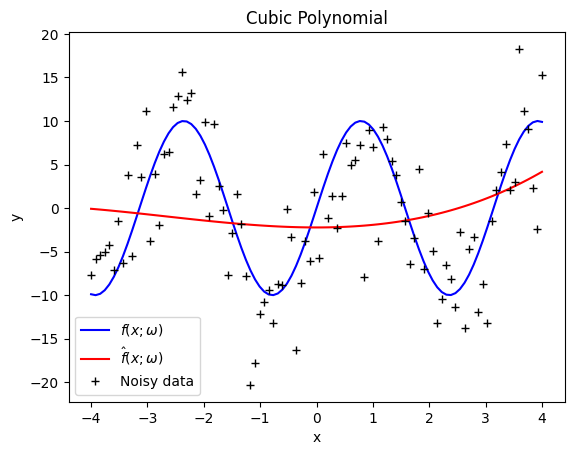

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(x, y, 'b', label="$f(x;\omega)$") # blue curve for groundtruth
plt.plot(x, y_pred, 'r', label="$\hat{f}(x;\omega)$") # red curve for predicted results
plt.plot(x, yn, 'k+', label="Noisy data")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial')
plt.legend()
plt.show()
# Question: Make comment on how the fitted results are comparable to the ground truth.

# **Part 3: Perform regression with linear basis expansion (piecewise linear model).**

In [ ]:
# working a spline regression (piecewise linear)
# Define a lambda function with two parameters x and degree: taking positive part of x {x}+ and then (({x}+))^degree
# Then reshape the results into a column
pfun = lambda x,degree: np.power((np.abs(x) + x)/2, degree).reshape(-1)

# polynomial degree = 1
degree = 1

# create basis matrix following Equation (3.11), split points locate at x=[-3, -2, -1, 0, 1, 2, 3]
knots = np.array([-3,-2,-1,0,1,2,3])
X =   # Create two columns, first column all one; second column x. 100X2
for kj in knots:
  X =  # append a column of bases (x-kj)+ to the right of X
                                        # In total, append (x+3)+, (x+2)+...x, (x-1)+, (x-3)+ seven columns
                                        # Each pfun(x-kj, degree) has a dimension of 100X1


w =  # solve for coefficient w for yn ~ {intercetp| (x+3)+|(x+2)+|...|(x-3)+}w via solving X'Xw= X'yn

y_pred =

# Plot the results
# Question: Make comparision between the piecewise linear model with the ground truth
plt.plot(x, y, 'b', label="$f(x;\omega)$")
plt.plot(x, y_pred, 'r', label="$\hat{f}(x;\omega)$")
plt.plot(x, yn, 'k+', label="Noisy data")
plt.xlabel('x')
plt.title('Linear Spline Regression')
plt.legend()
plt.show()

# **Part 4: Perform regression with cubic basis expansion (piecewise cubic model)**

In [ ]:
# working a spline regression (piecewise cubic)

# polynomial degree = 3
degree = 3

# create basis matrix following Equation (3.12), split points locate at x=[-3, -2, -1, 0, 1, 2, 3]
knots =
# Create four columns, first column all one; second column x, third x^2, fourth x^3
X =
for kj in knots:
  # append (x+3)+^3, (x+2)+^3, ... (x-3)+^3  seven columns to the right of the four columns in X above
  X =
# solve for coefficient w in yn ~ intercept| x | x^2 | x^3| (x+3)+^3| (x+2)+^3...|(x-3)+^3
w =

y_pred =

# Plot the results
# Question: Compare the regression with cubic basis expansion vs. ground truth
plt.plot(x, y, 'b', label="$f(x;\omega)$")
plt.plot(x, y_pred, 'r', label="$\hat{f}(x;\omega)$")
plt.plot(x, yn, 'k+', label="Noisy data")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Regression (7 knots)')
plt.legend()
plt.show()

In [ ]:
# Alternative implementation: Using patsy library's dmatrix (design matrix) function

from patsy import dmatrix
# specify a B-spline (bs function) with degree 3 (cubic) and degree of freedom 9 (5 knots and 3 interiot knots)
# return a design matrix in the format of dataframe
# X will be a dataframe table with columns similar to (x-kj)+^3...
X = dmatrix("bs(x, df=9, degree=3, include_intercept=False)",
                        {"x": x}, return_type='dataframe')

w =  # solve for yn ~ intercept|x|x^2|x^3|(x-jk)^3... via solving X'Xw= X'yn

y_pred =

# Plot the results
plt.plot(x, y, 'b', label="$f(x;\omega)$")
plt.plot(x, y_pred, 'r', label="$\hat{f}(x;\omega)$")
plt.plot(x, yn, 'k+', label="Noisy data")
plt.xlabel('x')
plt.title('B-Spline Regression')
plt.legend()
plt.show()

# **Part 5: Kernel Regression**

In [ ]:
# kernel regression
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_kernel(x1, x2, s):
    return np.exp(-np.power(euclidean_distances(x1, x2), 2)/(2*s**2))

s = 2
alpha = 1e-8
# ridge penalty alpha = very small is approximately to a standard kernel regression
# Construct a design matrix for kernel basis (Gram matrix)
X =

# Fit coefficient to data
w =
# Make prediction
y_pred =

# Plot the results
# Question: Compare the results with ground truth
plt.plot(x, y, 'b', label="$f(x;\omega)$")
plt.plot(x, y_pred, 'r', label="$\hat{f}(x;\omega)$")
plt.plot(x, yn, 'k+', label="Noisy data")
plt.xlabel('x')
plt.title('Kernel Regression')
plt.legend()
plt.show()